# **Final Project**

- Group: 7

- Member:
    + 20127214: Nguyễn Trương Minh Khôi
    + 20127612: Đỗ Khánh Sang

---

## Table of contents
**[1. Collecting data](#intro)**
* [1. What subject is your data about?](#intro1)
* [2. What is the source of your data?](#intro2)
* [3. Do authors of this data allow you to use like this? You can check the data license](#intro3)
* [4. How did authors collect data?](#intro4)

**[2. Exploring data](#body1)**
* [1. Load data](#subbody1-1)
* [2. How many rows and how many columns?](#subbody1-2)
* [3. What is the meaning of each row?](#subbody1-3)
* [4. Are there duplicated rows?](#subbody1-4)
* [5. What is the meaning of each column?](#subbody1-5)
* [6. What is the current data type of each column? Are there columns having inappropriate data types?](#subbody1-6)
* [7. With each numerical column, how are values distributed?](#subbody1-7)
* [8. With each categorical column, how are values distributed?](#subbody1-8)

**[3. Asking meaningfull questions](#body2)**
* [1. Question 1](#subbody2-1)
* [2. Question 2](#subbody2-2)
* [3. Question 3](#subbody2-3)
* [4. Question 4](#subbody2-4)
* [5. Question 5](#subbody2-5)
* [6. Question 6](#subbody2-6)
* [7. Question 7](#subbody2-7)

**[4. Preprocessing + analyzing data to answer each question](#body3)**
* [Question 1: Distribution of Wine Reviews by all countries](#subbody3-1)
* [Question 2: Relation between Price and Points, is it true that the higher the point, the more expensive the wine?](#subbody3-2)
* [Question 3: Find out top 5 countries which are produce good wines](#subbody3-3)
* [Question 4: Find out the most common wine variety.Whether wines made from this variety has high cost?](#subbody3-4)
* [Question 5: Relation between the length of Description and Points, is it true that the longer the description, the higher the point?](#subbody3-5)
* [Question 6: Relation between Price and Points and Descripton length, is it true that the higher the point and descripton length, the more expensive the wine?](#subbody3-6)
* [Question 7: The country with the highest point of bottles of wine has the lowest average price](#subbody3-7)

**[5. Reflection](#body4)**

**[6. References](#body5)**

---

## **Import**

In [1]:
!pip install sqlalchemy psycopg2-binary pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.3 MB/s eta 0:00:00


In [2]:
import sys
sys.executable

'/usr/bin/python3'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import copy
from datetime import datetime, timedelta
from collections import Counter
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sqlalchemy import create_engine

---

## **1.Collecting Data** <a name = 'intro'></a>

### **1.What subject is your data about?** <a name = 'subintro1'></a>

Main subject of my data is about reviews all kind of wine around the world such as: the number of points WineEnthusiast rated the wine, the country that the wine is from, the winery that made the wine, the cost for a bottle of the wine,…. Through this <mark>report</mark> we can know where there is a lot of expensive wine, where there is a lot of cheap wine, the relationship between the price of wine and other factors such as wine price, taster's description or what type of grape is used the most to make good wine and so on.

### **2.What is the source of your data?** <a name = 'subintro2'></a>

My team take dataset from [Kaggle](https://www.kaggle.com/datasets/zynicide/wine-reviews)

### **3.Do authors of this data allow you to use like this? You can check the data license** <a name = 'subintro3'></a>

- The authors totally agree me to use this data because this is a public dataset on kaggle and I can download it
- Data license: `CC BY-NC-SA 4.0`

### **4.How did authors collect data?** <a name = 'subintro4'></a>

The data was scraped from `WineEnthusiast` during the week of June 15th, 2017. The code for the scraper can be found [here](https://github.com/zackthoutt/wine-deep-learning) if you have any more specific questions about data collection that I didn't address.

## **2.Exploring Data** <a name = 'body1'></a>

### **1. Load data from NANO cloud server** <a name = 'subbody1-1'></a>

In [7]:
# create connection to neon server
with open("connection_string.txt", "r") as file_object:
    connection_string = file_object.read()

engine = create_engine(connection_string)

In [8]:
# load data
query = "SELECT * FROM wine_data;"
wine_df = pd.read_sql(query, engine)
# wine_df.drop("Unnamed: 0", axis=1, inplace=True) # Drops a single column by name
wine_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.626109,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119924,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,None,None,Anna Lee C. Iijima,None,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
119925,US,Citation is given as much as a decade of bottl...,None,90,75.000000,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
119926,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,None,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
119927,France,"A dry style of Pinot Gris, this is crisp with ...",None,90,32.000000,Alsace,Alsace,None,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### **2. How many rows and how many columns?** <a name = 'subbody1-2'></a>

Next, get the number of rows and columns of the DataFrame `wine_df` and store it in `num_rows` and `num_cols` variables.

In [9]:
query_row = "SELECT count(*) FROM wine_data;"
num_rows = pd.read_sql(query_row, engine)

query_col = "SELECT COUNT(*) \
            FROM information_schema.columns\
            WHERE table_schema = 'public' AND table_name = 'wine_data';"
num_cols =  pd.read_sql(query_col, engine)

print(num_rows)
print(num_cols)


    count
0  119929
   count
0     13


### **3. What is the meaning of each row?** <a name = 'subbody1-3'></a>

**Each row provides diferent information such as price, country, winery,... about different wines**

### **4. Are there duplicated rows?** <a name = 'subbody1-4'></a>

We are going to check that and save the result into `num_duplicated_rows`. The value of this variable is `greater than zero` if the data is duplicated and vice versa.

In [10]:
num_duplicated_rows = len(wine_df) - len(wine_df.drop_duplicates())
print('Duplicated:', num_duplicated_rows)


Duplicated: 0


In [11]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.626109,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119924,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,None,None,Anna Lee C. Iijima,None,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
119925,US,Citation is given as much as a decade of bottl...,None,90,75.000000,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
119926,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,None,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
119927,France,"A dry style of Pinot Gris, this is crisp with ...",None,90,32.000000,Alsace,Alsace,None,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


### **5. What is the meaning of each column?** <a name = 'subbody1-5'></a>

The data consists of 13 fields:

- *Points*: the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
- *Title*: the title of the wine review, which often contains the vintage if you're interested in extracting that feature
- *Variety*: the type of grapes used to make the wine (ie Pinot Noir)
- *Description*: a few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- *Country*: the country that the wine is from
- *Province*: the province or state that the wine is from
- *Region 1*: the wine growing area in a province or state (ie Napa)
- *Region 2*: sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
- *Winery*: the winery that made the wine
- *Designation*: the vineyard within the winery where the grapes that made the wine are from
- *Price*: the cost for a bottle of the wine
- *Taster Name*: name of the person who tasted and reviewed the wine
- *Taster Twitter Handle*: Twitter handle for the person who tasted ane reviewed the wine

### **6. What is the current data type of each column? Are there columns having inappropriate data types?** <a name = 'subbody1-6'></a>

We check the datatype (`dtype`) of each element in a column in `wine_df` and store the results in a series named `col_dtypes`. The index of this series is the name of the columns.

In [12]:
col_dtypes = wine_df.dtypes
col_dtypes

,0
country,object
description,object
designation,object
points,int64
price,float64
province,object
region_1,object
region_2,object
taster_name,object
taster_twitter_handle,object


- As we can see, `points` and `price` are columns are suitable for numeric columns, the others are object type
- There are not any inappropriate data types

### **7. With each numerical column, how are values distributed?** <a name = 'subbody1-7'></a>
- What is the percentage of `missing values`?
- `Min`? `max`? Are they `abnormal`?

For now, there are 2 columns that seem to be numeric data: "points", "price".

For each of numeric column, we will compute the percentage of missing values; min, max value and store them into a dataframe named `nume_col_profiles_df`. This dataframe contains 3 rows ("missing_ratio", "min", "max") and 2 columns ("points", "price").

In [13]:
nume_col_profiles_df = pd.DataFrame(columns = ["points", "price"],
                                    index = ['missing_ratio', 'min', 'lower_quartile',
                                             'median', 'upper_quartile' ,'max'], data = np.nan)


nume_col_profiles_df.loc['missing_ratio'] = np.array(wine_df[nume_col_profiles_df.columns].isnull().sum() * 100
                                             / len(wine_df[nume_col_profiles_df.columns]))

nume_col_profiles_df.loc['min'] = wine_df[nume_col_profiles_df.columns].min()

nume_col_profiles_df.loc['max'] = wine_df[nume_col_profiles_df.columns].max()

nume_col_profiles_df.loc['lower_quartile'] = wine_df[nume_col_profiles_df.columns].quantile(0.25)
nume_col_profiles_df.loc['median'] = wine_df[nume_col_profiles_df.columns].quantile(0.5)
nume_col_profiles_df.loc['upper_quartile'] = wine_df[nume_col_profiles_df.columns].quantile(0.75)

nume_col_profiles_df

,points,price
missing_ratio,0.0,0.0
min,80.0,4.0
lower_quartile,86.0,18.0
median,88.0,28.0
upper_quartile,91.0,40.0
max,100.0,3300.0


### **8. With each categorical column, how are values distributed?** <a name = 'subbody1-8'></a>
- What is the percentage of `missing values`?
- How many `different values`? Show a few
- Are they `abnormal`?

`wine_df` contains 11 categorical columns: "country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery" .

For each of categorical column:
- compute the percentage of missing values
- number of different values (missing values are not counted),
- a list of different values (missing values are not counted)

Then store them into a dataframe named `cate_col_profiles_df`. This dataframe contains 3 rows ("missing_ratio", "num_diff_vals", "diff_vals") and 11 columns ("country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery").

In [14]:
cate_col_profiles_df = pd.DataFrame(columns = ["country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery"],
                                   index = ["missing_ratio", "num_diff_vals", "diff_vals"])

cate_col_profiles_df.loc['missing_ratio'] = (wine_df[cate_col_profiles_df.columns].isnull().sum() * 100
                                             / len(wine_df[cate_col_profiles_df.columns]))

cate_col_profiles_df.loc['num_diff_vals'] = wine_df[cate_col_profiles_df.columns].nunique()

cate_col_profiles_df.loc['diff_vals'] = wine_df[cate_col_profiles_df.columns].ffill().agg(['unique']).loc['unique']

cate_col_profiles_df

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
missing_ratio,0.0,0.0,28.796204,0.0,16.260454,61.00276,20.776459,24.55286,0.0,0.000834,0.0
num_diff_vals,43,119896,37954,425,1229,17,19,15,118781,701,16745
diff_vals,"[Italy, Portugal, US, Spain, France, Germany, ...","[Aromas include tropical fruit, broom, brimsto...","[Vulkà Bianco, Avidagos, Reserve Late Harvest,...","[Sicily & Sardinia, Douro, Oregon, Michigan, N...","[Etna, Willamette Valley, Lake Michigan Shore,...","[None, Willamette Valley, Napa, Sonoma, Centra...","[Kerin O’Keefe, Roger Voss, Paul Gregutt, Alex...","[@kerinokeefe, @vossroger, @paulgwine , @wines...","[Nicosia 2013 Vulkà Bianco (Etna), Quinta dos...","[White Blend, Portuguese Red, Pinot Gris, Ries...","[Nicosia, Quinta dos Avidagos, Rainstorm, St. ..."


Percent missing value by feature

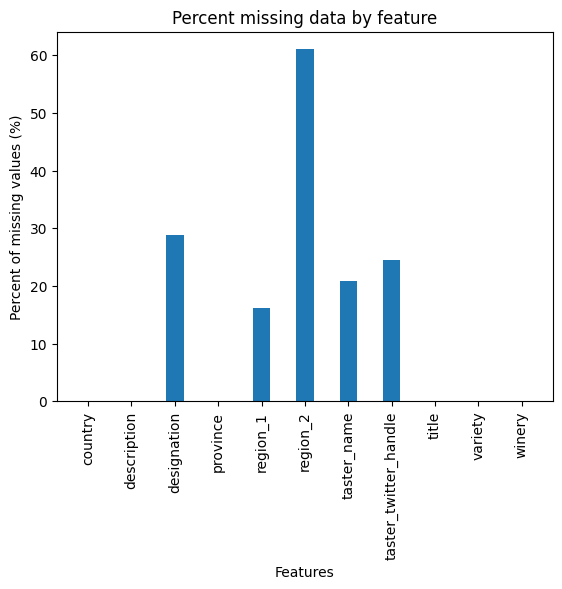

In [15]:
plt.xticks(rotation=90)
plt.bar(cate_col_profiles_df.columns, cate_col_profiles_df.loc['missing_ratio'], width = 0.4)
plt.xlabel('Features')
plt.ylabel('Percent of missing values (%)')
plt.title('Percent missing data by feature');

## **3. Asking meaningful questions** <a name = 'body2'></a>

### **Question 1** <a name = 'subbody2-1'></a>

***Distribution of Wine Reviews by all countries***

**Benefit:**
Having an overview of distribution of wine review by all countries. Furthermore, we can predict which country has the most wines because there are many reviews

### **Question 2** <a name = 'subbody2-2'></a>

***Relation between Price and Points, is it true that the higher the point, the more expensive the wine?***

**Benefit:**
To help people have a view of wine when expecting to spend a lot of money, will there be a good quality of wine?

### **Question 3** <a name = 'subbody2-3'></a>

***Find out top 5 countries which are produce good wines***

**Benefit:** <br>
- For buinessman when they want to conduct wine, they would like to find the approriate market so the answer of this question will help them to have a perspective of wine industry. Then, they will know where is the potential market for their buisness to make a correct investment decision.
- For wine producer country, knowing their ranking will help them assert themself (their reputation, population,...)

### **Question 4** <a name = 'subbody2-4'></a>

***Find out the most common wine variety.Whether wines made from this variety has high cost?***

**Benefit:**
Wine producers may wonder what variety should be used to make the good wine which means the wine must has good taste, smelling, look, feel. In the other hand, if they can produce an actual good wine, they can make a high price for their wine production. The answer of this question will help them find it out.

### **Question 5** <a name = 'subbody2-5'></a>

***Relation between the length of Description and Points, is it true that the longer the description, the higher the point?***

**Benefit:**
There are a lot of aspects to evalute a good wine such as which country the wine was produced from, high price,... One of them is the description about the wine. This aspect will be provided by expert so the reliability is high. So we will consider if one wine has a long description which means it is a good wine. Consumers can count on its description to choose a good wine.

### **Question 6** <a name = 'subbody2-6'></a>

***Relation between Price and Points and Descripton length, is it true that the higher the point and descripton length, the more expensive the wine?***

**Benefit:** In question 2, we say about the relation between Price and Points, and in question 5, we say about the relation between Points and description length. Whether these 3 factors have anything to do with each other, affect the price of wine or not. The answer to this question will show it

### **Question 7** <a name = 'subbody2-7'></a>

***The country with the highest point of bottles of wine has the lowest average price***

**Benefit:** As we discussed in question 2, it's not that wine with a high score will be expensive and vice versa, but an expensive wine will definitely score high. So in this question, we will find the country with the most high-scoring bottles of wine with the lowest average price, from which wine lovers but do not have a lot of money can visit that country to experience wine.

## **4. Preprocessing + analyzing data to answer each question** <a name = 'body3'></a>

## **Question 1: Distribution of Wine Reviews by all countries** <a name = 'subbody3-1'></a>

### Data Analysis

#### Explanation:

In [16]:
# Code
# countries = q1_wine_df.groupby(by=['country'])['country'].count().sort_values()
# countries

query = """
SELECT country, COUNT(*) AS country_count
FROM wine_data
WHERE country IS NOT NULL
GROUP BY country
ORDER BY country_count ASC;
"""

countries = pd.read_sql(query, engine)
countries



,country,country_count
0,Slovakia,1
1,Egypt,1
2,China,1
3,Armenia,2
4,Bosnia and Herzegovina,2
5,Luxembourg,5
6,Switzerland,6
7,India,8
8,Serbia,8
9,Cyprus,10


### Data Visualization

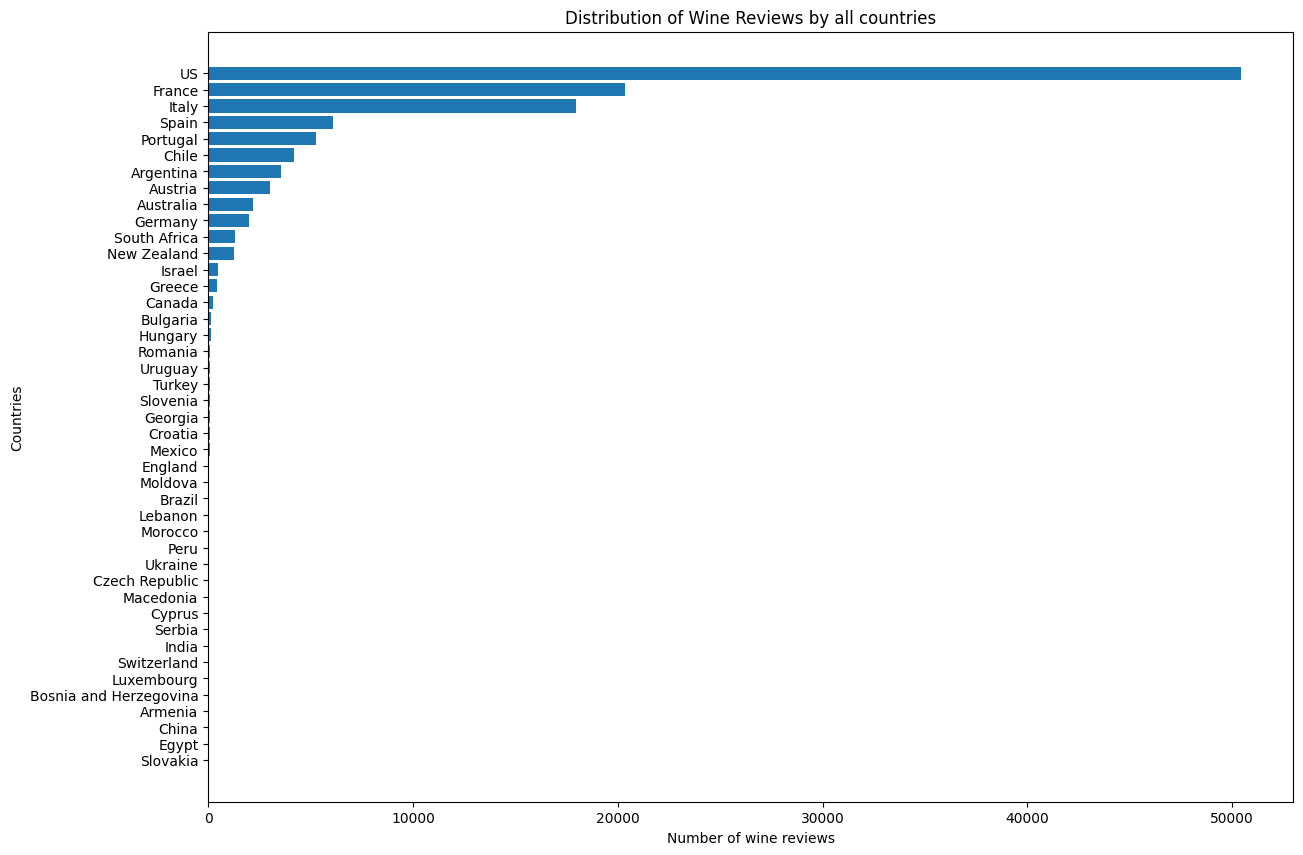

In [17]:
# Code
plt.figure(figsize=(14,10))
# plt.barh(countries.index, countries.values)
plt.barh(countries['country'], countries['country_count'])
plt.xlabel('Number of wine reviews')
plt.ylabel('Countries')
plt.title('Distribution of Wine Reviews by all countries');

***Comments:***
- There are 43 countries here
- US contribute the most in the review
- Slovakia contribute the least in the review

## **Question 2: Relation between Price and Points, is it true that the higher the point, the more expensive the wine?** <a name = 'subbody3-2'></a>

### Preprocessing

In [18]:
# Code
# q2_wine_df = wine_df.fillna(wine_df['price'].mean())

query = """
SELECT points, price
FROM wine_data;
"""
result = pd.read_sql(query, engine)
result

,points,price
0,87,35.626109
1,87,15.000000
2,87,14.000000
3,87,13.000000
4,87,65.000000
...,...,...
119924,90,28.000000
119925,90,75.000000
119926,90,30.000000
119927,90,32.000000


### Data Visualization

##### Scatter plot between Price and Points

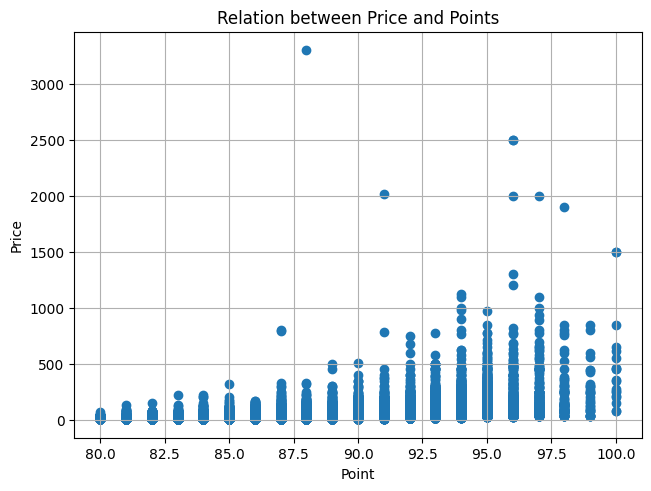

In [19]:
plt.figure(constrained_layout=True)
plt.grid()
plt.scatter(result['points'], result['price'])
plt.xlabel('Point')
plt.ylabel('Price')
plt.title('Relation between Price and Points')
plt.show()

***Comments:***
- Not only are the low-scoring bottles cheap, but there are also a lot of low-scoring bottles that are cheap, but in terms of quantity, the high-score bottles will have more expensive bottles, the higher the score, the more expensive the bottles will be. There will be more expensive bottles of wine.
- There is an anomaly on the chart where the price of that wine is very high (>3000) but the rating is only in the range of 87.5 to 90. But only such a point is likely to be outlier and not have much of an impact to the conclusion

-> So the conclusion is not that high-scoring bottles will be expensive, but if it's expensive wine bottles, the points will be high

## **Question 3: Find out top 5 countries which are produce good wines** <a name = 'subbody3-3'></a>

### Preprocessing

In [20]:
# Code
# drop rows that not have Point values

q3_wine_df = wine_df
# points_missing = q3_wine_df[q3_wine_df['points'].isna()]
# q3_wine_df.drop(points_missing.index, inplace = True)

### Data Analysis

#### Explanation:
- Wine Spectator's 100-Point Scale [(link)](https://www.winespectator.com/articles/scoring-scale)
    - 95-100 Classic: a great wine
    - 90-94 Outstanding: a wine of superior character and style
    - 85-89 Very good: a wine with special qualities
    - 80-84 Good: a solid, well-made wine
    - 75-79 Mediocre: a drinkable wine that may have minor flaws
    - 50-74 Not recommended
- Idea: find countries that have the number of wine point >= 80
    - Count the number of wine point of each country in the dataset. Only count if the wine point is greater than 80 which means at least it is good wine
    - Sort these values descending to find out top 5 countries that are produce good wines

In [21]:
# Code
# get all rows that contain point from good upwards
good_wines = q3_wine_df[q3_wine_df['points'] >= 80]
# count occurence of each coutry with good point value
countries = good_wines['country'].tolist()
countries_occurence = Counter(countries)
# sort descending to get top 5 countries with good wines
top_5_countries = sorted(countries_occurence.items(), key=lambda item: item[1], reverse = True)
top_5_countries = top_5_countries[0:5]
# store to DataFrame
index_name = ['Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5']
top_5_countries_df = pd.DataFrame(top_5_countries, index = index_name, columns = ['Country', 'Number of good wines produced'])
top_5_countries_df


,Country,Number of good wines produced
Top 1,US,50457
Top 2,France,20353
Top 3,Italy,17940
Top 4,Spain,6116
Top 5,Portugal,5256


### Data Visualization

Text(0.5, 1.0, 'Top 5 countries that produced the most good wines')

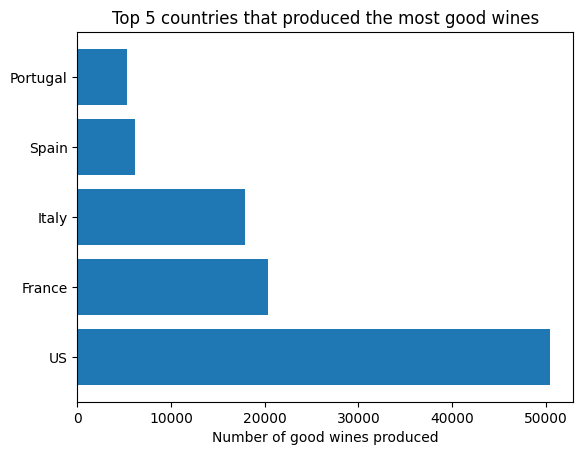

In [22]:
# Code
plt.barh(top_5_countries_df['Country'], top_5_countries_df['Number of good wines produced'])
plt.xlabel('Number of good wines produced')
plt.title('Top 5 countries that produced the most good wines')

***Comments***
- USA is the most good wine producer country and Portugal is the least good wine producer country
- France produced the number of good wines same as Italy
- Spain produced the number of good wines same as Portugal

## **Question 4: Find out the most common wine variety.Whether wines made from this variety has high cost?** <a name = 'subbody3-4'></a>

### Preprocessing

In [23]:
# Code
# drop rows that not have Point values
q4_wine_df = wine_df
# points_missing = q4_wine_df[q4_wine_df['points'].isna()]
# q4_wine_df.drop(points_missing.index, inplace = True)
# fill in missing value in 'price' column with median
# med_price_wine = q4_wine_df.median()
# q4_wine_df[['price']] = q4_wine_df[['price']].fillna(value = med_price_wine)

### Data Analysis

#### Explanation:
Idea: find the most common wine variety used to make good wine. After find out this variety, use it to put out all wines that made from this variety and check their prices. If the price of all wines that made from this variety is supposed to be high cost then the variety made all most high cost wines.
- Get all good wines which means wines have good point (point >= 80).
- Statistic all the varieties used to make these wine -> get the most common variety
- Get all wine which made from that variety
- Check their prices whether it a high cost or not by comparing its price with the median value in the whole market price

In [24]:
# Code
# get all good wines
good_wines = q4_wine_df[q4_wine_df['points'] >= 80]
# get the most common wine variety
most_wine_variety = good_wines['variety'].mode().tolist()[0]
# get all wines that made from 'most_wine_variety'
wines_most_variety = good_wines.loc[good_wines['variety'] == most_wine_variety]
# calculate median price in a whole wines market
med_price_wine = good_wines['price'].median()
# get all wine whose price is larger than the median price
high_cost_wines =  wines_most_variety.loc[(wines_most_variety['price'] >= med_price_wine)]
# calculate the percentage that wines made from 'most_wine_variety' will have high price
percen_high_cost = high_cost_wines['price'].count() * 100 / wines_most_variety['price'].count()

### Data Visualization

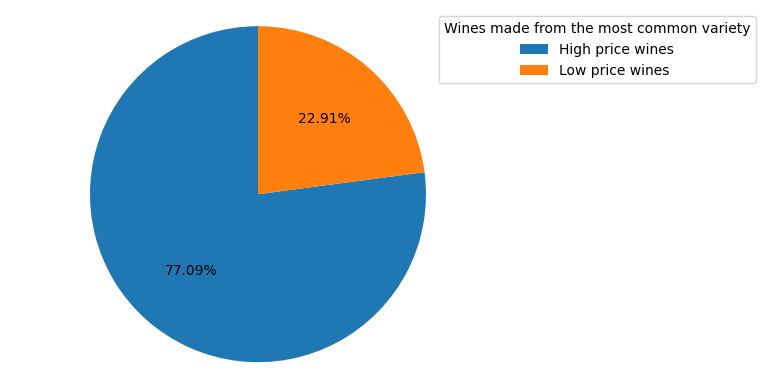

In [25]:
# Code
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
mylabels = ['High price wines', 'Low price wines']
sizes = [percen_high_cost, 100 - percen_high_cost]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%.2f%%', startangle=90)
ax1.axis('equal')
plt.legend(title = 'Wines made from the most common variety', bbox_to_anchor=(0.85, 1), loc='upper left', labels=mylabels)

plt.show()

***Comments*** <br>
The probability of wines made from the most common variety will have the high cost is very high

#### Top 10 most common wine variety

In [26]:
# get all good wines
good_wines = q4_wine_df[q4_wine_df['points'] >= 80]
# get the most common wine variety
ten_most_wine_variety = good_wines['variety'].tolist()
ten_most_wine_variety = Counter(ten_most_wine_variety)
# sort descending to get top 5 countries with good wines
ten_most_wine_variety = dict(sorted(ten_most_wine_variety.items(), key=lambda item: item[1], reverse = True)[0:10])
ten_most_wine_variety

{'Pinot Noir': 12275,
 'Chardonnay': 10865,
 'Cabernet Sauvignon': 8838,
 'Red Blend': 8233,
 'Bordeaux-style Red Blend': 6471,
 'Riesling': 4772,
 'Sauvignon Blanc': 4571,
 'Syrah': 3828,
 'Rosé': 3219,
 'Merlot': 2895}

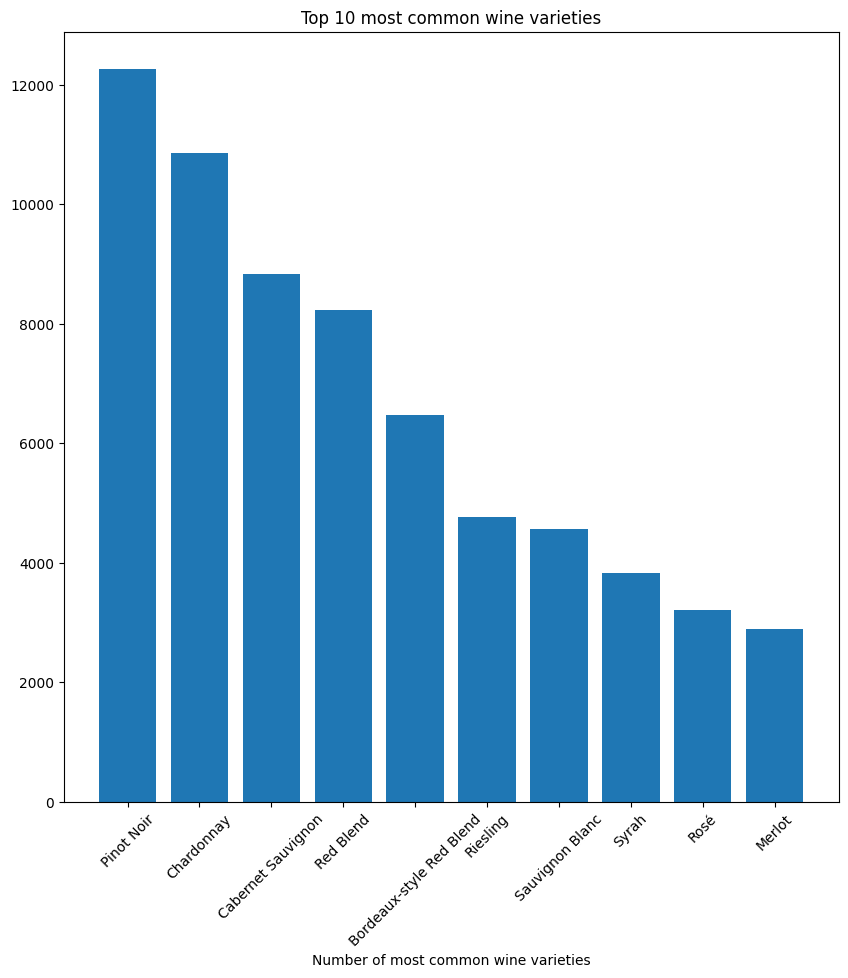

In [27]:
# Code
plt.figure(figsize=(10,10))
plt.bar(ten_most_wine_variety.keys(), ten_most_wine_variety.values())
plt.xticks(rotation = 45)
plt.xlabel('Number of most common wine varieties')
plt.title('Top 10 most common wine varieties');

## **Question 5: Relation between the length of Description and Points, is it true that the longer the description, the higher the point?** <a name = 'subbody3-5'></a>

### Preprocessing

In [28]:
# Code
q5_wine_df = copy.deepcopy(wine_df)

### Data Analysis

#### Explanation:
Idea: calculate length of each description in the dataset and store it to a corresponding column `description_len` and then draw line chart to see the trend of points and description

In [29]:
# Code
# add new column to the dataframe which contains length of each description
q5_wine_df['description_len'] = q5_wine_df['description'].str.split().str.len()
description_point = q5_wine_df.groupby(by = 'description_len')[['points']].mean().reset_index()
description_point


,description_len,points
0,3,88.000000
1,4,88.000000
2,5,86.500000
3,6,82.333333
4,7,82.750000
...,...,...
113,119,96.000000
114,120,95.000000
115,122,95.000000
116,125,94.000000


### Data Visualization

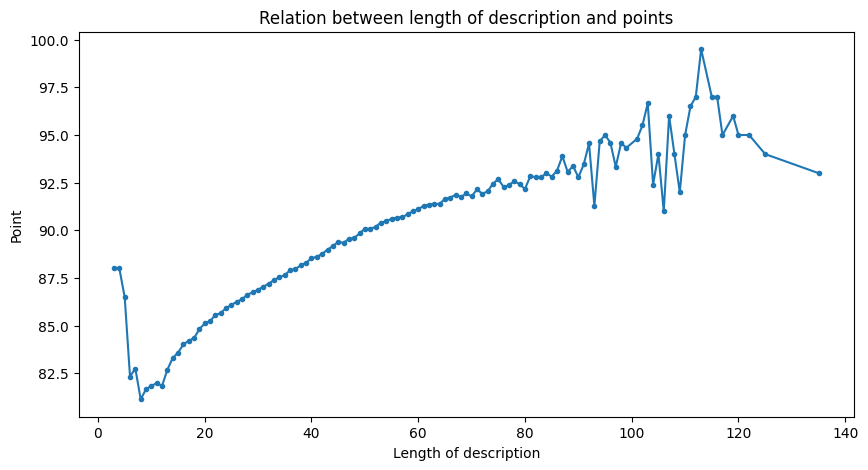

In [30]:
# Code
plt.figure(figsize=(10,5))
plt.plot(description_point['description_len'], description_point['points'], marker = ".")
plt.xlabel('Length of description')
plt.ylabel('Point')
plt.title('Relation between length of description and points')
plt.show()

***Comments*** <br>
- From the chart above, we can see that the trend is only up when the length of description reach at least 20 and it tends to increase steadily.
- Generally, the length of description is directly proportional to the point of wine which means the longer the description the higher point the wine can get.

## **Question 6: Relation between Price and Points and Descripton length, is it true that the higher the point and descripton length, the more expensive the wine?** <a name = 'subbody3-6'></a>

### Preprocessing

In this question, we will create a new column named `Title_len` stroring the length of `description`

In [31]:
q6_wine_df = copy.deepcopy(wine_df)
q6_wine_df['Title_len'] = q6_wine_df['description'].str.split().str.len()

### Data Analysis

Then, for each title length, calculate average of point and price

In [32]:
rev = q6_wine_df.groupby('Title_len')[['points', 'price']].mean().reset_index()

### Data Visualization

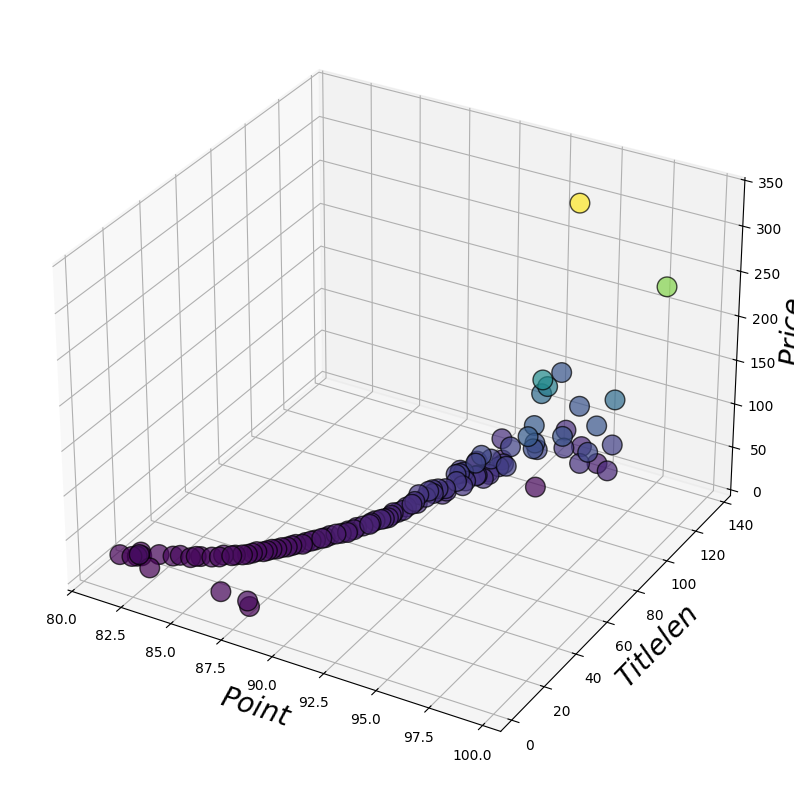

In [33]:
x = rev['points']
y = rev['Title_len']
z = rev['price']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
ax.set_xlabel('$Point$', fontsize=20)
ax.set_ylabel('$Title len$', fontsize=20)
ax.set_zlabel('$Price$', fontsize=20)
plt.show()

***Comments:***
- As they can see on the 3D chart, as the point goes up, title length goes up, the price of the wine will also increase.
- So that, price of wines depend on both point and description length

## **Question 7: The country with the highest point of bottles of wine has the lowest average price** <a name = 'subbody3-7'></a>

### Preprocessing

For each `country`, calculate average `price` and `point`

In [41]:
mean_price = wine_df.groupby(['country',])['price'].median().sort_values(ascending=False)
mean_price = mean_price.sort_index()
mean_price

,price
country,
Argentina,17.000000
Armenia,14.500000
Australia,21.000000
Austria,29.000000
Bosnia and Herzegovina,12.500000
Brazil,25.000000
Bulgaria,14.000000
Canada,30.000000
Chile,15.000000


In [42]:
mean_point = wine_df.groupby(['country',])['points'].median().sort_values(ascending=False)
mean_point = mean_point.sort_index()
mean_point

,points
country,
Argentina,86.0
Armenia,87.5
Australia,89.0
Austria,90.0
Bosnia and Herzegovina,86.5
Brazil,85.0
Bulgaria,89.0
Canada,90.0
Chile,86.0


### Data Analysis

After that, merger two columns into `df` dataframe. As you can see `point` is always greater than `price`, we expect affordable wine to be wine that has a high point and a low price, so surely the higher the difference between the point and the price, the correct result to look for.

In [43]:
data = {"mean price": mean_price,
        "mean point": mean_point,
        "difference": mean_point.subtract(mean_price, fill_value=0)}
df = pd.concat(data,axis = 1)
df['country'] = df.index
df = df.sort_values('difference')
df

,mean price,mean point,difference,country
country,,,,
England,50.000000,92.0,42.000000,England
Egypt,35.626109,84.0,48.373891,Egypt
Italy,34.000000,88.0,54.000000,Italy
Switzerland,34.000000,89.5,55.500000,Switzerland
US,30.000000,88.0,58.000000,US
France,30.000000,89.0,59.000000,France
Brazil,25.000000,85.0,60.000000,Brazil
Canada,30.000000,90.0,60.000000,Canada
Austria,29.000000,90.0,61.000000,Austria


### Data Visualization

Visualize 10 countries have highest the difference between the point and the price

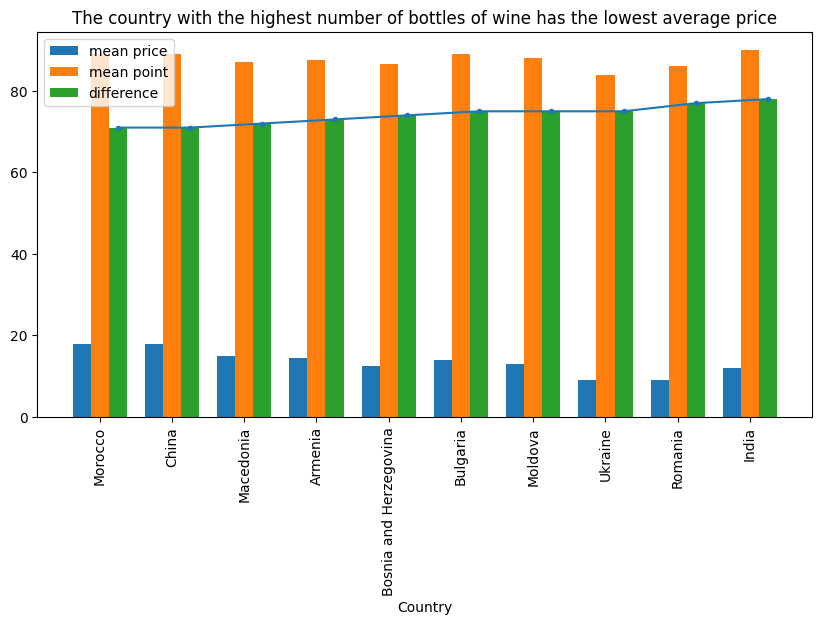

In [44]:
country = df.tail(10)['country']
mean_price = df.tail(10)['mean price']
mean_point = df.tail(10)['mean point']
difference = df.tail(10)['difference']
X_axis = np.arange(len(country))

plt.figure(figsize=(10,5))

plt.bar(X_axis, mean_price,0.25, label = 'mean price')
plt.bar(X_axis + 0.25, mean_point, 0.25, label = 'mean point')
plt.bar(X_axis + 0.5, difference, 0.25, label = 'difference')
plt.plot(X_axis + 0.5, difference, marker = ".")

plt.xticks(X_axis + 0.25, country, rotation=90)
plt.xlabel("Country")
plt.ylabel("")
plt.title("The country with the highest number of bottles of wine has the lowest average price")
plt.legend()
plt.show()

***Comments:***
- `India` is the best place that has the most high-scoring bottles of wine with the lowest average price, from which wine lovers but do not have a lot of money can visit `India` to experience good wine with little money

## **5.Reflection** <a name = 'body4'></a>

1. What difficulties have you encountered?
    + Undertanding clearly each column of my dataset, why these need to be had in my dataset, there are enough column for me to work
    + Making meaning full questions. Answering questions may be easy for me, but asking meaningful questions takes a lot of my time.
    + Working with `Github` make me a litte confused, this is the first time i've used this tool to control group's source code and it happened a lot of conflicts when my team try to merge invidual branches into main branch

2. What have you learned?
    + Make a meaningful question and answer it
    + Relatively proficient use of github
    + Know more about new kind of chart

3. If you had more time, what would you do?
    + To be master at using `Github`
    + Bulid a small model to predict wine quality based on grape type, country, score, .... using Regression Modeling and Machine Learning

## **6.References** <a name = 'body5'></a>

https://www.kaggle.com/datasets/zynicide/wine-reviews <br>
https://stackoverflow.com/questions/59232073/scatter-plot-with-3-variables-in-matplotlib <br>
https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/ <br>
https://pandas.pydata.org/docs/user_guide/index.html#user-guide <br>
https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html